In [1]:
from __future__ import print_function

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale
from sklearn.preprocessing import normalize

from sklearn import cross_validation as cv
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import r2_score, mean_squared_error as mse

from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import LinearRegression

from sklearn.neighbors import KNeighborsClassifier

/Users/karenoconnell/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# Load the general dataset
general = os.path.join('general.csv')
gen = pd.read_csv(general,sep=',')
gen.columns = [
               'cand_id','cycle','c1','c2','c3','c4','c5','c6','c7','c8','c9','c10','c11',
    'c12','c13','state_abbreviation','district','incumbent','party','primary_votes','runoff_votes',
    'general_votes','ge_runoff_election_votes','winner','total_votes','totalspend','costvote'
]

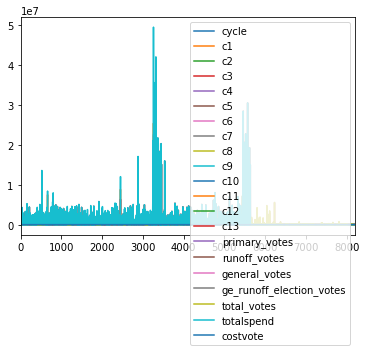

In [3]:
gen.plot()
plt.show()

In [4]:
def classify(attributes, targets, model):
    """
    Executes classification using the specified model and returns
    a classification report.
    """
    # Split data into 'test' and 'train' for cross validation
    splits = cv.train_test_split(attributes, targets, test_size=0.2)
    X_train, X_test, y_train, y_test = splits

    model.fit(X_train, y_train)
    y_true = y_test
    y_pred = model.predict(X_test)
    print(classification_report(y_true, y_pred, target_names=list(general)))

In [5]:
#features = general[['c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9', 'c10', 'c11', 'c12', 'c13']]
#labels   = general['totalspend']

# Scale the features
#stdfeatures = scale(features)

#classify(stdfeatures, labels, LinearSVC())
#classify(stdfeatures, labels, KNeighborsClassifier())

In [6]:
def regress(attributes, targets, model):
    # Split data into 'test' and 'train' for cross validation
    splits = cv.train_test_split(attributes, targets, test_size=0.2)
    X_train, X_test, y_train, y_test = splits

    model.fit(X_train, y_train)
    y_true = y_test
    y_pred = model.predict(X_test)
    print("Mean squared error = {:0.3f}".format(mse(y_true, y_pred)))
    print("R2 score = {:0.3f}".format(r2_score(y_true, y_pred)))

/Users/karenoconnell/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


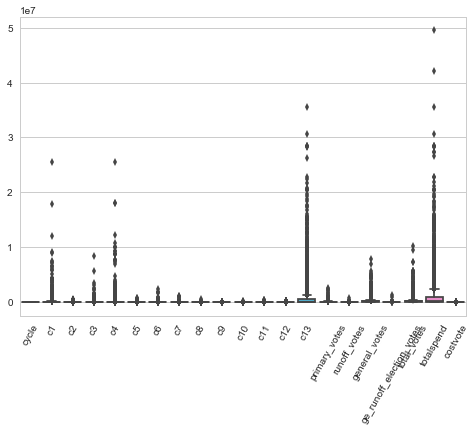

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

def box_viz(df):
    ax = sns.boxplot(gen)
    plt.xticks(rotation=60)
    plt.show()

box_viz(gen)

/Users/karenoconnell/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


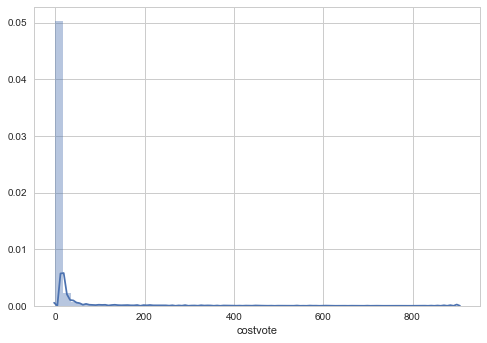

In [8]:
def hist_viz(df,feature):
    ax = sns.distplot(df[feature])
    plt.xlabel(feature)
    plt.show()

hist_viz(gen,'costvote') # We need to specify a feature vector

In [9]:
#def splom_viz(df, labels=None):
#    ax = sns.pairplot(df, hue=labels, diag_kind='kde', size=2)
#    plt.show()

#splom_viz(gen)

In [10]:
#from pandas.tools.plotting import radviz

#def rad_viz(df,labels):
#    fig = radviz(df, labels, color=sns.color_palette())
#    plt.show()

#rad_viz(gen.ix[:,1:],'totalspend') # Specify which column contains the labels

In [11]:
#from pandas.tools.plotting import parallel_coordinates

#def pcoord_viz(df, labels):
#    fig = parallel_coordinates(df, labels, color=sns.color_palette())
#    plt.show()

#pcoord_viz(gen.ix[:,1:],'costvote') # Specify which column contains the labels

In [12]:
gen.head()

,cand_id,cycle,c1,c2,c3,c4,c5,c6,c7,c8,...,incumbent,party,primary_votes,runoff_votes,general_votes,ge_runoff_election_votes,winner,total_votes,totalspend,costvote
0,H0AK00089,2010,550.00,0.00,0.00,0.00,0.0,785.00,0.00,0.0,...,0,D,38673.0,0.0,77606.0,0.0,0,116279.0,220001.06,1.892010
1,H0AL02087,2012,11727.82,0.00,16964.09,0.00,0.0,0.00,0.00,0.0,...,1,R,0.0,0.0,180591.0,0.0,1,180591.0,694953.98,3.848220
2,H0AL02087,2014,12132.25,0.00,16866.78,0.00,0.0,0.00,0.00,0.0,...,1,R,0.0,0.0,113103.0,0.0,1,113103.0,570473.48,5.043840
3,H0AL03184,2010,14.95,1441.91,0.00,5000.00,0.0,2293.50,0.00,0.0,...,0,D,0.0,0.0,80204.0,0.0,0,80204.0,8750.36,0.109101
4,H0AL05163,2010,54616.04,2343.79,71452.12,547321.04,27000.0,66857.04,9362.66,249.0,...,0,R,35746.0,0.0,131109.0,0.0,1,166855.0,780579.65,4.678192


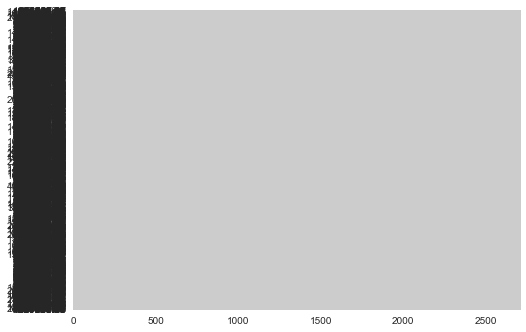

In [13]:
gen.totalspend.value_counts().plot(kind= 'barh')
plt.show()

In [14]:
#def hist_viz(cspend,feature):
#    ax = sns.distplot(cspend[feature])
#    plt.xlabel(feature)
#    plt.show()

#hist_viz(cspend,'totalspend') # We need to specify a feature vector

In [15]:
gen.head()

,cand_id,cycle,c1,c2,c3,c4,c5,c6,c7,c8,...,incumbent,party,primary_votes,runoff_votes,general_votes,ge_runoff_election_votes,winner,total_votes,totalspend,costvote
0,H0AK00089,2010,550.00,0.00,0.00,0.00,0.0,785.00,0.00,0.0,...,0,D,38673.0,0.0,77606.0,0.0,0,116279.0,220001.06,1.892010
1,H0AL02087,2012,11727.82,0.00,16964.09,0.00,0.0,0.00,0.00,0.0,...,1,R,0.0,0.0,180591.0,0.0,1,180591.0,694953.98,3.848220
2,H0AL02087,2014,12132.25,0.00,16866.78,0.00,0.0,0.00,0.00,0.0,...,1,R,0.0,0.0,113103.0,0.0,1,113103.0,570473.48,5.043840
3,H0AL03184,2010,14.95,1441.91,0.00,5000.00,0.0,2293.50,0.00,0.0,...,0,D,0.0,0.0,80204.0,0.0,0,80204.0,8750.36,0.109101
4,H0AL05163,2010,54616.04,2343.79,71452.12,547321.04,27000.0,66857.04,9362.66,249.0,...,0,R,35746.0,0.0,131109.0,0.0,1,166855.0,780579.65,4.678192


In [16]:
cspend = gen.filter(['c1','c2','c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9', 'c10', 'c11', 'c12', 'c13'], axis=1)

In [17]:
cspend.head()

,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13
0,550.00,0.00,0.00,0.00,0.0,785.00,0.00,0.0,0.0,0.0,0.0,0.0,218666.06
1,11727.82,0.00,16964.09,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,666262.07
2,12132.25,0.00,16866.78,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,541474.45
3,14.95,1441.91,0.00,5000.00,0.0,2293.50,0.00,0.0,0.0,0.0,0.0,0.0,0.00
4,54616.04,2343.79,71452.12,547321.04,27000.0,66857.04,9362.66,249.0,0.0,0.0,0.0,0.0,1626.96


/Users/karenoconnell/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


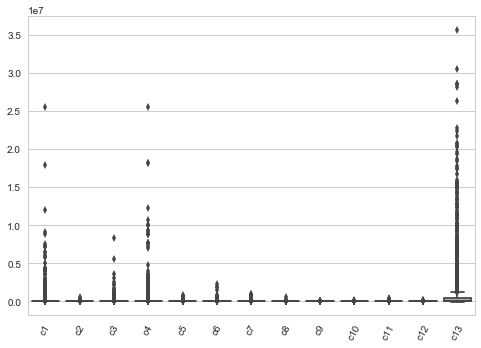

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

def box_viz(df):
    ax = sns.boxplot(cspend)
    plt.xticks(rotation=60)
    plt.show()

box_viz(cspend)

In [19]:
plt.show()

In [20]:
#features = cpsend[]
#labels   = cspend[]

# Scale the features
#stdfeatures = scale(features)

#classify(stdfeatures, labels, LinearSVC())
#classify(stdfeatures, labels, KNeighborsClassifier())

In [21]:
#def splom_viz(df, labels=None):
 #   ax = sns.pairplot(df, hue=labels, diag_kind='kde', size=2)
#    plt.show()

#splom_viz(cspend)

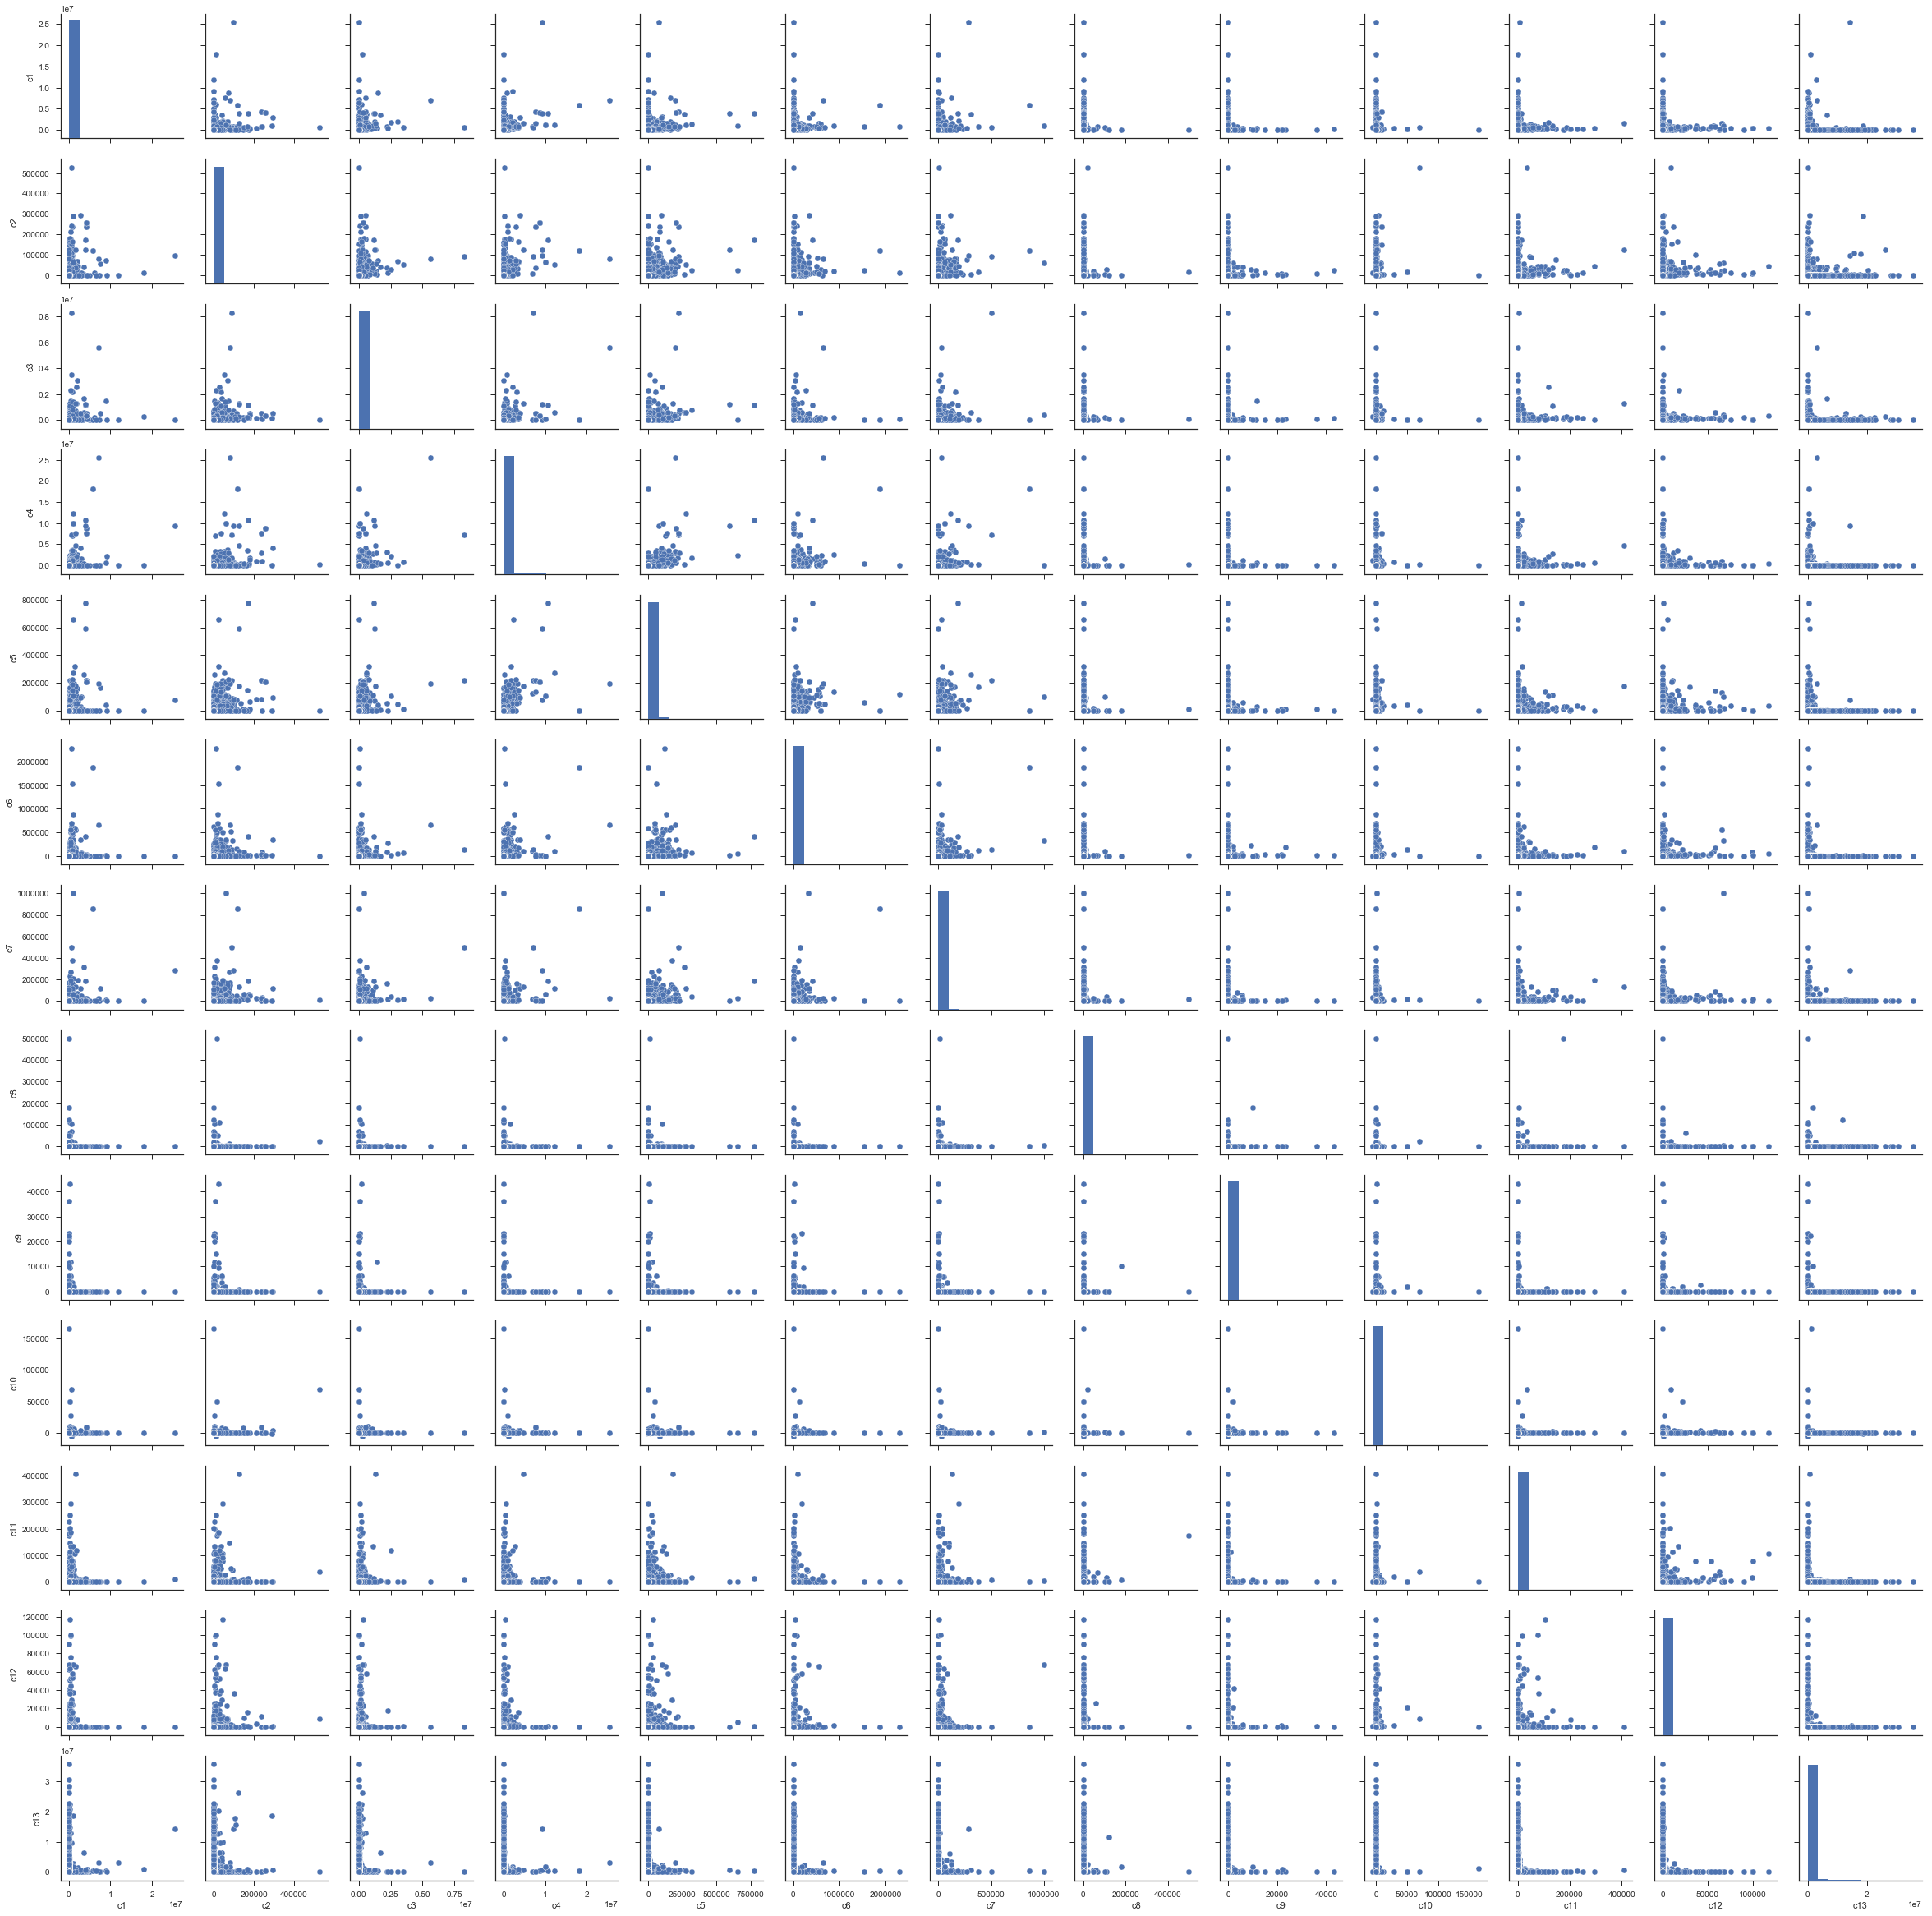

In [22]:
sns.set(style="ticks")
sns.pairplot(cspend)
plt.show()

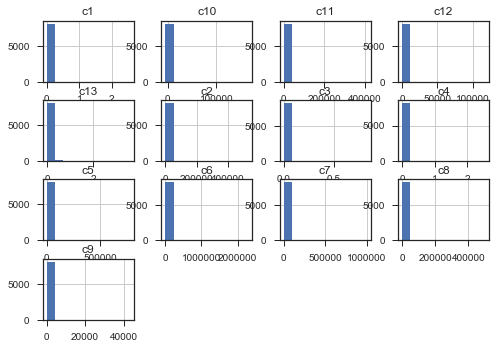

In [23]:
cspend.hist()
plt.show()

In [24]:
cspend.head()

,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13
0,550.00,0.00,0.00,0.00,0.0,785.00,0.00,0.0,0.0,0.0,0.0,0.0,218666.06
1,11727.82,0.00,16964.09,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,666262.07
2,12132.25,0.00,16866.78,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,541474.45
3,14.95,1441.91,0.00,5000.00,0.0,2293.50,0.00,0.0,0.0,0.0,0.0,0.0,0.00
4,54616.04,2343.79,71452.12,547321.04,27000.0,66857.04,9362.66,249.0,0.0,0.0,0.0,0.0,1626.96


In [25]:
#
#plt.figure()
#values = ['c1','c2','c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9', 'c10', 'c11', 'c12', 'c13']
#labels = ['c1','c2','c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9', 'c10', 'c11', 'c12', 'c13']

#plt.pie(values, labels=labels, autopct='%.2f')

#plt.show()

In [26]:
cspend.describe()

,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13
count,8.213000e+03,8213.000000,8.213000e+03,8.213000e+03,8213.000000,8.213000e+03,8.213000e+03,8213.000000,8213.000000,8213.000000,8213.000000,8213.000000,8.213000e+03
mean,1.135745e+05,4061.222854,3.459565e+04,1.051760e+05,5801.780386,9.377898e+03,3.864802e+03,179.584555,41.562651,92.046523,1143.413799,426.940119,5.740178e+05
std,5.393104e+05,16729.377074,1.621167e+05,6.404058e+05,23956.670138,5.808186e+04,2.584147e+04,6404.753425,862.691798,2315.317981,10712.754826,4125.721165,1.821689e+06
min,-2.900000e-01,-390.000000,-1.900000e-01,-7.500000e+02,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,-5000.000000,0.000000,0.000000,-4.920380e+04
25%,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
50%,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,9.600590e+03
75%,3.401606e+04,477.000000,6.238620e+03,5.401690e+03,0.000000,5.600000e+02,1.123000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,4.678489e+05
max,2.545184e+07,527439.630000,8.283133e+06,2.546524e+07,777330.090000,2.290329e+06,1.000230e+06,500000.000000,43129.070000,164844.000000,407000.000000,117400.000000,3.563831e+07


In [27]:
cspend['party'] = gen.party

In [28]:
cspend = cspend.replace('D',1)

In [29]:
cspend = cspend.replace('R',0)

In [30]:
cspend = cspend.replace('L',3)

In [31]:
cspend.head()


,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,party
0,550.00,0.00,0.00,0.00,0.0,785.00,0.00,0.0,0.0,0.0,0.0,0.0,218666.06,1
1,11727.82,0.00,16964.09,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,666262.07,0
2,12132.25,0.00,16866.78,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,541474.45,0
3,14.95,1441.91,0.00,5000.00,0.0,2293.50,0.00,0.0,0.0,0.0,0.0,0.0,0.00,1
4,54616.04,2343.79,71452.12,547321.04,27000.0,66857.04,9362.66,249.0,0.0,0.0,0.0,0.0,1626.96,0


In [32]:
#cspend = pd.DataFrame(np.random.randn(1000, 13), columns=['c1','c2','c3','c4','c5','c6','c7','c8','c9','c10','c11','c12','c13'])

#scatter_matrix(cspend, alpha=0.2, figsize=(12, 12), diagonal='kde')
#plt.show()

In [33]:
#cspend.plot.kde()
#plt.show()

In [34]:
cspend.head()

,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,party
0,550.00,0.00,0.00,0.00,0.0,785.00,0.00,0.0,0.0,0.0,0.0,0.0,218666.06,1
1,11727.82,0.00,16964.09,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,666262.07,0
2,12132.25,0.00,16866.78,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,541474.45,0
3,14.95,1441.91,0.00,5000.00,0.0,2293.50,0.00,0.0,0.0,0.0,0.0,0.0,0.00,1
4,54616.04,2343.79,71452.12,547321.04,27000.0,66857.04,9362.66,249.0,0.0,0.0,0.0,0.0,1626.96,0


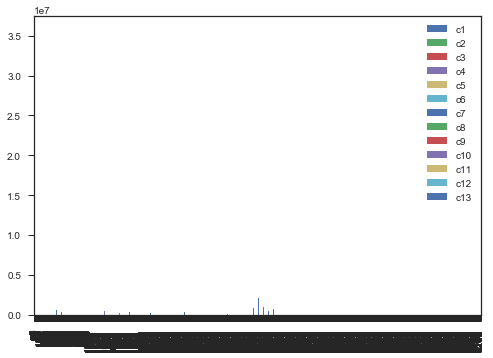

In [ ]:
cspend.plot.bar()
plt.show()

In [ ]:
cspend.plot.bar(stacked=True)
plt.show()

In [ ]:
cspend.plot.hist(bins=1000)
plt.show()

In [ ]:
cspend.sum().plot.box()
plt.show()

In [ ]:
cspend.sum()

In [ ]:
cspend.head()
